---
##### ***Name : Ashuwin P***
##### ***Register No : 3122 22 5002 013***
##### ***Course : UIT2721 Deep Learning Concepts and Architectures***
##### ***Exercise : 2***
---

In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [2]:
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

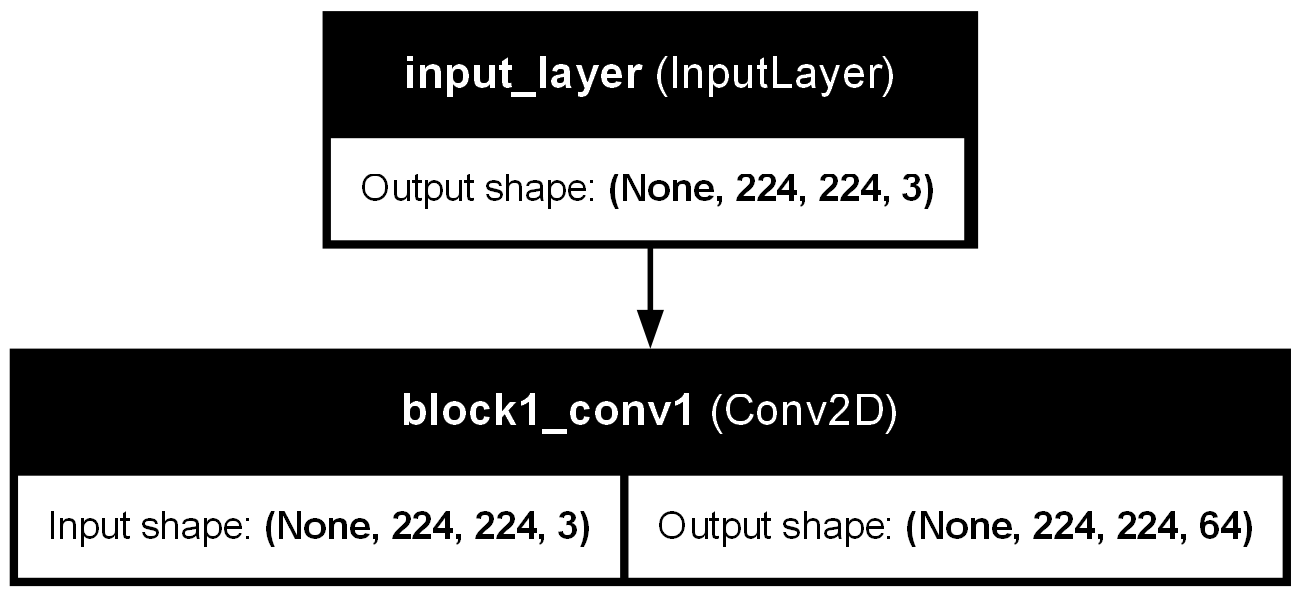

In [3]:
plot_model(model, to_file="model_plot_3.png", show_shapes=True, show_layer_names=True)
Image(filename="model_plot_3.png")

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# load the image with the required shape
img = load_img('..\sample_images\sam1.jpeg', target_size=(224, 224))

In [8]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [9]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


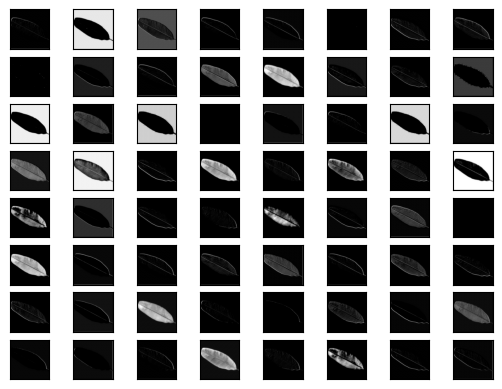

In [10]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()